In [1]:
import matplotlib.pyplot as plt
from sklearn import metrics
from catboost import CatBoostClassifier
import numpy as np
import pandas as pd

In [2]:
cols = ['Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol', 'Timestamp',
        'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets',
        'Total Length of Bwd Packets',
        'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean''Fwd Packet Length Std',
        'Bwd Packet Length Max',
        'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
        'Flow IAT Mean',
        'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
        'Fwd IAT Min',
        'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
        'Fwd URG Flags',
        'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
        'Min Packet Length', 'Max Packet Length',
        'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count',
        'RST Flag Count',
        'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio',
        'Average Packet Size',
        'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Fwd Header Length.1', 'Fwd Avg Bytes/Bulk',
        'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate',
        'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', 'Subflow Fwd Bytes',
        'Subflow Bwd Packets',
        'Subflow Bwd Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'act_data_pkt_fwd',
        'min_seg_size_forward',
        'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min',
        'SimillarHTTP',
        'Inbound', 'Label']

dataset = pd.read_csv('F:\\Outtawa\\AI CS\\interim\\training.csv', names=cols, skiprows=1)
# print(dataset)
dataset_val = pd.read_csv('F:\\Outtawa\\AI CS\\interim\\validation.csv', names=cols, skiprows=1)

C:\Users\Lobna Lolo\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py:3170: DtypeWarning: Columns (83) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:


dataset.drop(['Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol', 'Timestamp'],
             axis=1, inplace=True)
dataset_val.drop(['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
                  'Destination Port', 'Protocol', 'Timestamp'],
                 axis=1, inplace=True)

dataset.drop(['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'FIN Flag Count',
              'PSH Flag Count', 'ECE Flag Count',
              'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk',
              'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'], axis=1, inplace=True)
dataset_val.drop(
    ['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'FIN Flag Count', 'PSH Flag Count', 'ECE Flag Count',
     'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk',
     'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'], axis=1, inplace=True)

from sklearn.preprocessing import LabelEncoder

dataset['Label'] = dataset['Label'].replace({'DrDoS_DNS': 1})
dataset['Label'] = dataset['Label'].replace({'BENIGN': 0})
dataset_val['Label'] = dataset_val['Label'].replace({'DrDoS_DNS': 1})
dataset_val['Label'] = dataset_val['Label'].replace({'BENIGN': 0})

lbl_encoder = LabelEncoder()
dataset['SimillarHTTP'] = dataset['SimillarHTTP'].apply(lambda x: pd.to_numeric(x, errors='coerce'))
dataset_val['SimillarHTTP'] = dataset['SimillarHTTP'].apply(lambda x: pd.to_numeric(x, errors='coerce'))
dataset['SimillarHTTP'] = lbl_encoder.fit_transform(dataset['SimillarHTTP'])
dataset_val['SimillarHTTP'] = lbl_encoder.transform(dataset_val['SimillarHTTP'])

dataset.drop(['Flow Bytes/s'], axis=1, inplace=True)
dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
dataset.dropna(inplace=True)

xtrain, ytrain = dataset.iloc[:, :-1], dataset['Label']
dataset_val.drop(['Flow Bytes/s'], axis=1, inplace=True)
x_val, y_val = dataset_val.iloc[:, :-1], dataset_val['Label']


In [4]:
data_cleaned_train = pd.DataFrame()
data_cleaned_train['Init_Win_bytes_forward'] = xtrain['Init_Win_bytes_forward']
data_cleaned_train['Bwd Packet Length Mean'] = xtrain['Bwd Packet Length Mean']
data_cleaned_train['Fwd PSH Flags'] = xtrain['Fwd PSH Flags']
data_cleaned_train['Fwd Packet Length Max'] = xtrain['Fwd Packet Length Max']
data_cleaned_train['CWE Flag Count'] = xtrain['CWE Flag Count']
data_cleaned_train['Bwd Packet Length Min'] = xtrain['Bwd Packet Length Min']
data_cleaned_train['min_seg_size_forward'] = xtrain['min_seg_size_forward']
data_cleaned_train['Down/Up Ratio'] = xtrain['Down/Up Ratio']
data_cleaned_train['URG Flag Count'] = xtrain['URG Flag Count']
data_cleaned_train['Inbound'] = xtrain['Inbound']


data_cleaned_test = pd.DataFrame()
data_cleaned_test['Init_Win_bytes_forward'] = x_val['Init_Win_bytes_forward']
data_cleaned_test['Bwd Packet Length Mean'] = x_val['Bwd Packet Length Mean']
data_cleaned_test['Fwd PSH Flags'] = x_val['Fwd PSH Flags']
data_cleaned_test['Fwd Packet Length Max'] = x_val['Fwd Packet Length Max']
data_cleaned_test['CWE Flag Count'] = x_val['CWE Flag Count']
data_cleaned_test['Bwd Packet Length Min'] = x_val['Bwd Packet Length Min']
data_cleaned_test['min_seg_size_forward'] = x_val['min_seg_size_forward']
data_cleaned_test['Down/Up Ratio'] = x_val['Down/Up Ratio']
data_cleaned_test['URG Flag Count'] = x_val['URG Flag Count']
data_cleaned_test['Inbound'] = x_val['Inbound']

In [8]:

print('start training')

# choosing the model
model = CatBoostClassifier(iterations = 500, learning_rate = 0.05, eval_metric = 'F1', verbose = False, random_state = 42)
model.fit(data_cleaned_train, ytrain, verbose=False,  plot=False)
# model = AdaBoostClassifier(n_estimators=50,
#                          learning_rate=1)
# model.fit(data_cleaned_train, ytrain)

print('start testing on validation data')

# y_pred = model.predict(x_val)

start training
start testing on validation data


0.9999858261852208
0.9999929094810166
Accuracy: 0.9999858261852208


C:\Users\Lobna Lolo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


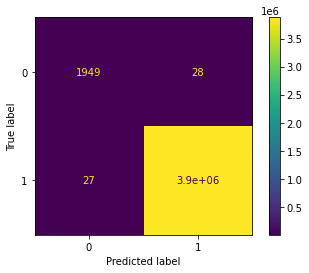

In [9]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, f1_score
y_pred_train = model.predict(data_cleaned_train)
print(accuracy_score(ytrain, y_pred_train))
print(f1_score(ytrain, y_pred_train))
print("Accuracy:",metrics.accuracy_score(ytrain, y_pred_train))

plot_confusion_matrix(model, data_cleaned_train, ytrain)
plt.show()

In [23]:
import timeit
strt = timeit.timeit()
model.predict(data_cleaned_test[::1])
end = timeit.timeit()
print(strt-end)

0.0009405999999216874


0.9998039572626832
0.9999014334394096
Accuracy: 0.9998039572626832


C:\Users\Lobna Lolo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


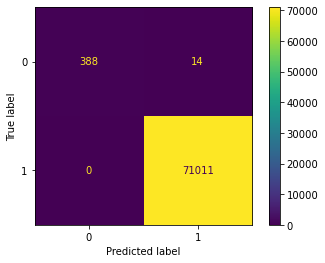

In [6]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, f1_score
y_pred = model.predict(data_cleaned_test)
print(accuracy_score(y_val, y_pred))
print(f1_score(y_val, y_pred))
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

plot_confusion_matrix(model, data_cleaned_test, y_val)
plt.show()

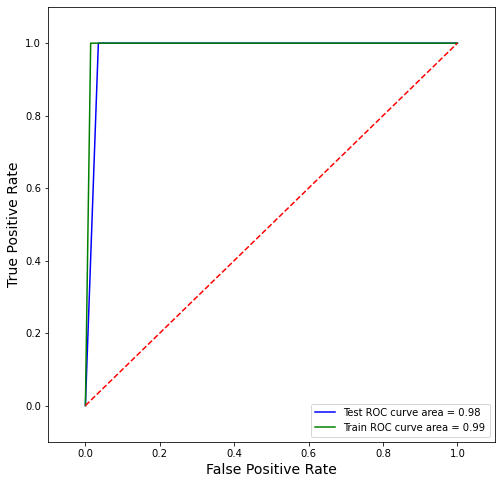

In [11]:
# false positive rate, true positive rate, thresholds
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_val, y_pred)
fpr2, tpr2, thresholds2 = metrics.roc_curve(ytrain, y_pred_train)
 # auc score
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
plt.figure(figsize=(8,8))
# plot auc 
plt.plot(fpr1, tpr1, color='blue', label='Test ROC curve area = %0.2f'%auc1)
plt.plot(fpr2, tpr2, color='green', label='Train ROC curve area = %0.2f'%auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend(loc='lower right')

plt.show()